#### AIM:
* In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not



#### USE:

* This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
* Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

##### Applied Models:


* Linear Regression
* KNN
* Logistic Regression
* Decision tree
* Random forest

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('../input/train.csv')

In [3]:
dataset.head()

battery_power  blue     ...       wifi  price_range
0            842     0     ...          1            1
1           1021     1     ...          0            2
2            563     1     ...          0            2
3            615     1     ...          0            2
4           1821     1     ...          0            1

[5 rows x 21 columns]

## Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
dataset.describe()

battery_power       blue     ...              wifi  price_range
count    2000.000000  2000.0000     ...       2000.000000  2000.000000
mean     1238.518500     0.4950     ...          0.507000     1.500000
std       439.418206     0.5001     ...          0.500076     1.118314
min       501.000000     0.0000     ...          0.000000     0.000000
25%       851.750000     0.0000     ...          0.000000     0.750000
50%      1226.000000     0.0000     ...          1.000000     1.500000
75%      1615.250000     1.0000     ...          1.000000     2.250000
max      1998.000000     1.0000     ...          1.000000     3.000000

[8 rows x 21 columns]

## Data Visualization & Analysis

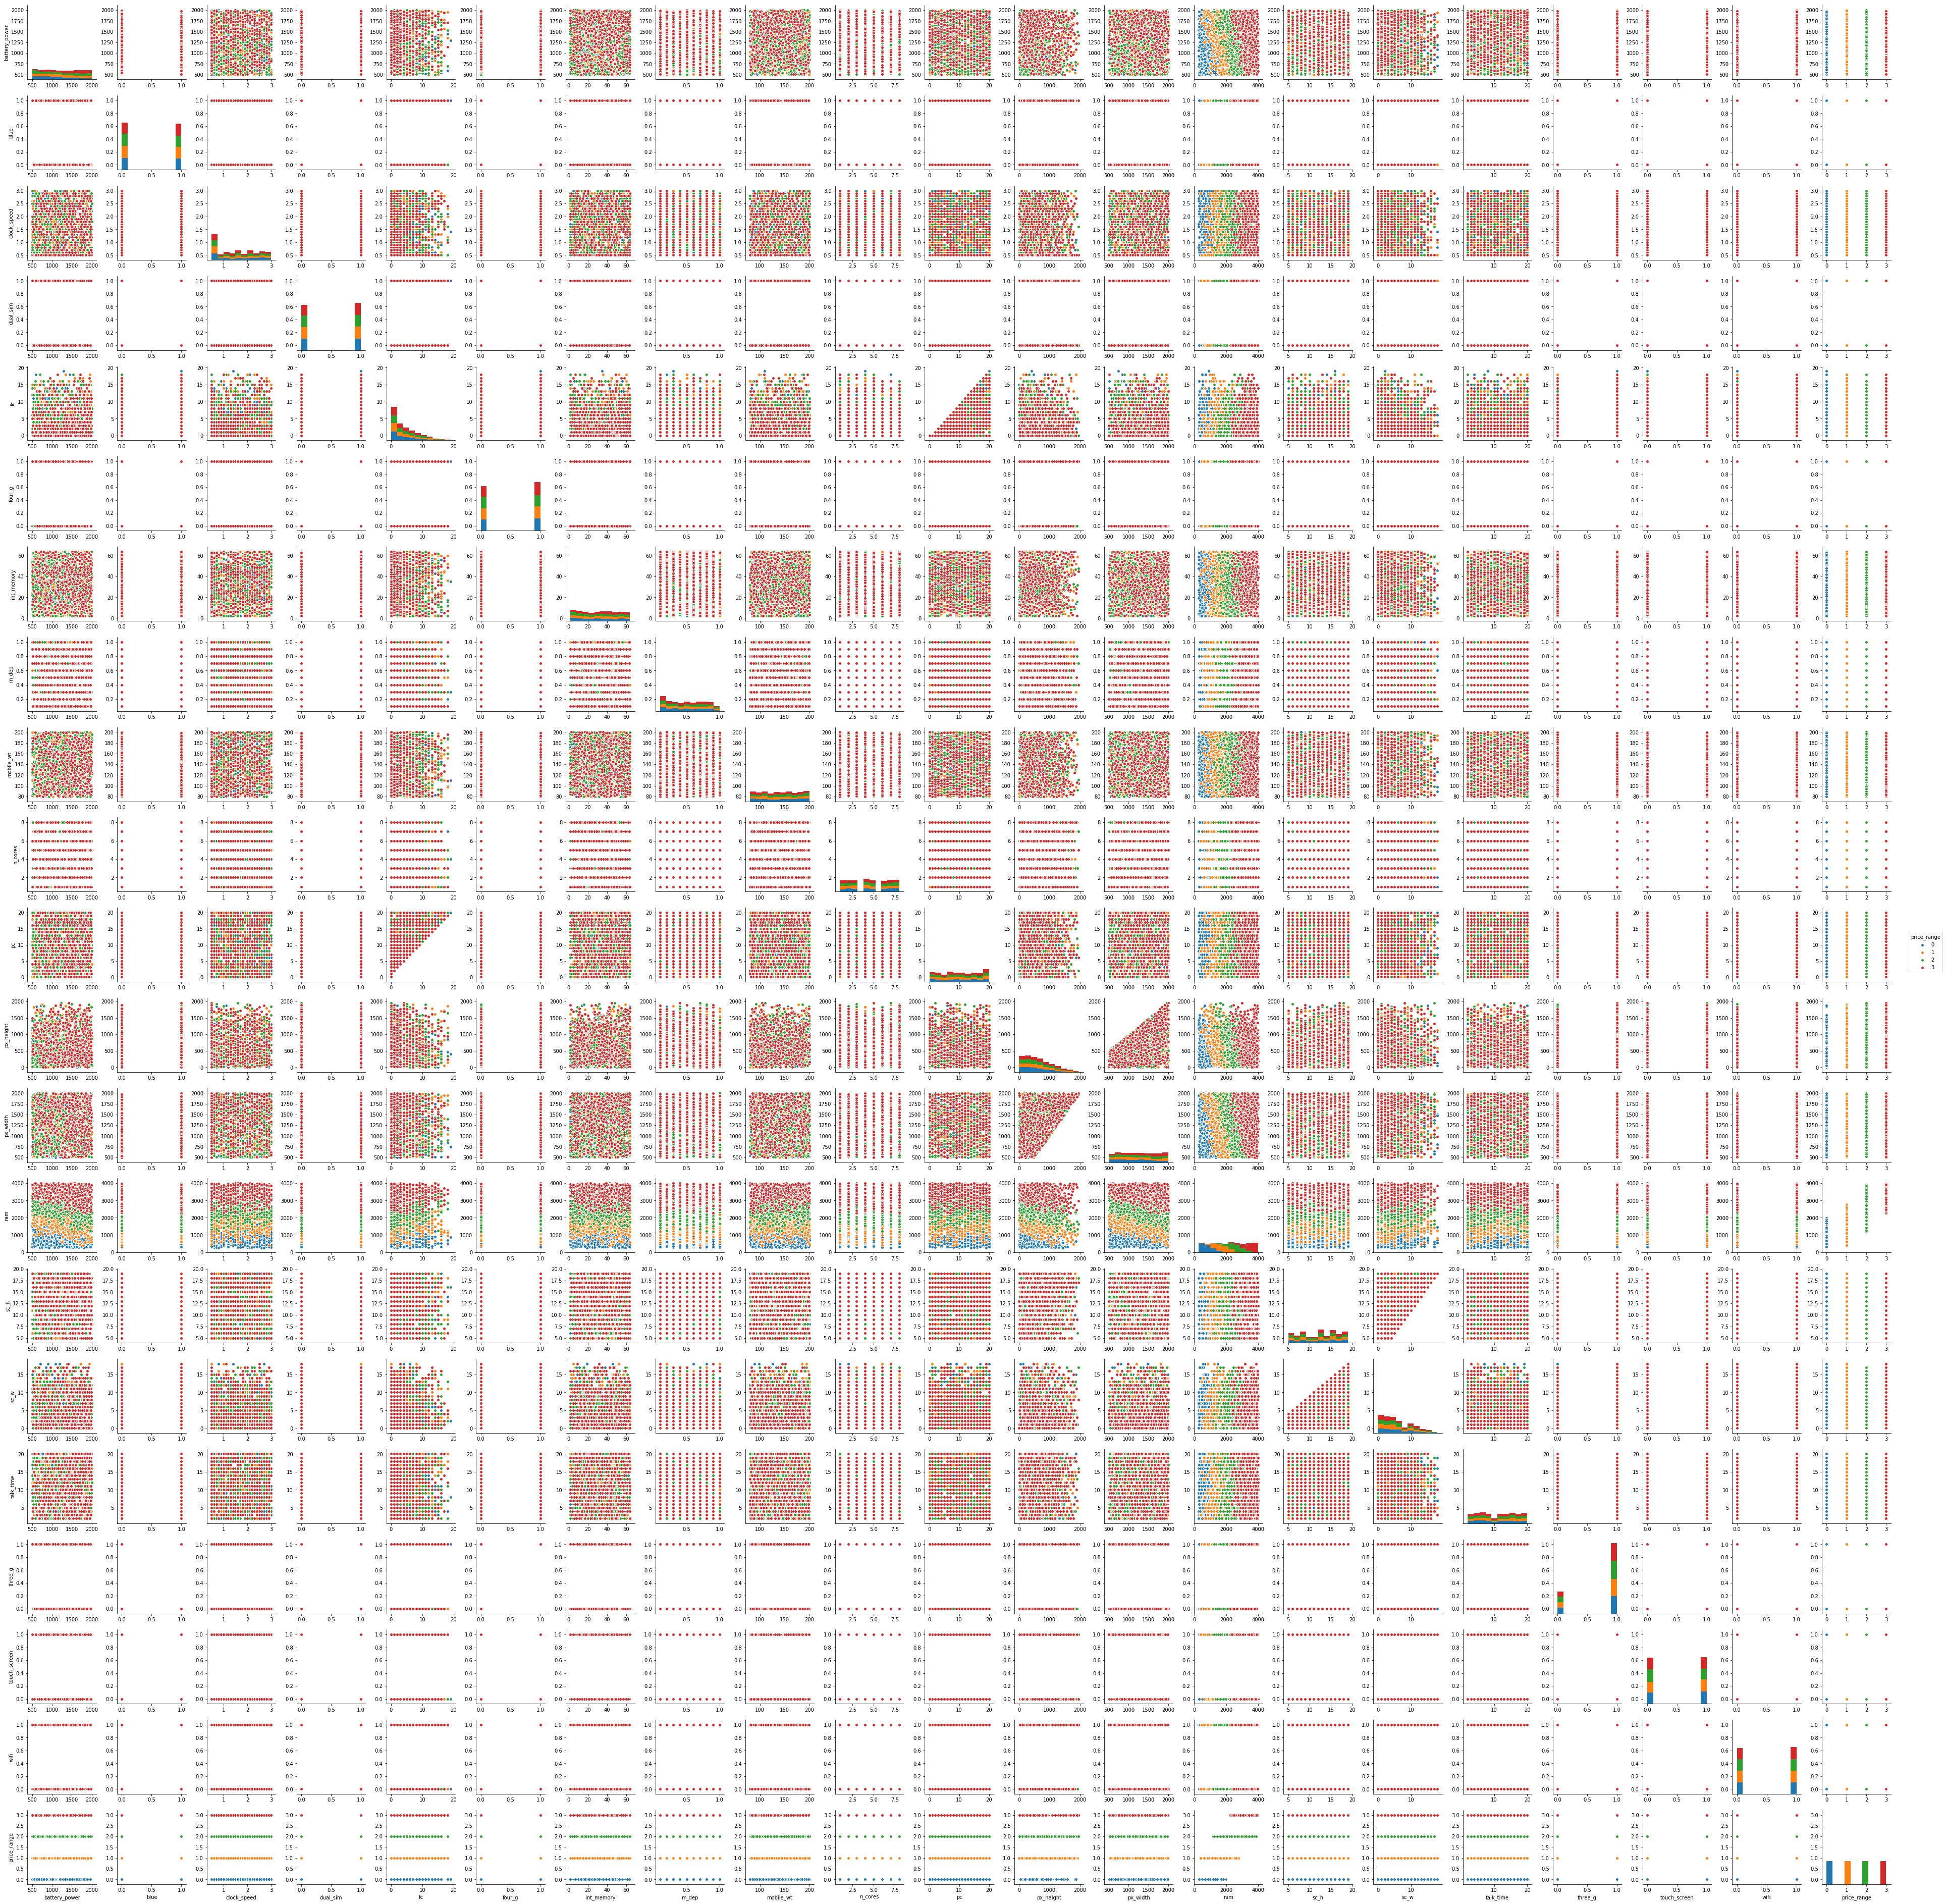

In [6]:
sns.pairplot(dataset,hue='price_range')

### How does ram is affected by price

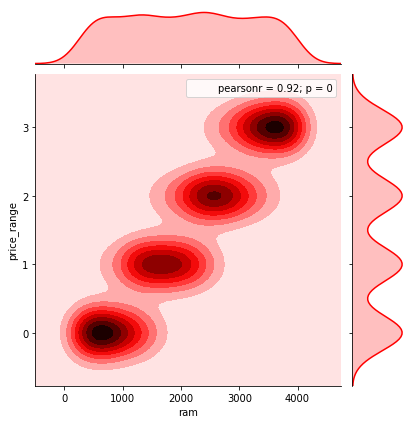

In [7]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

### Internal Memory vs Price Range

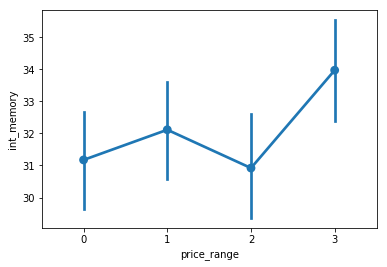

In [8]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

In [9]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

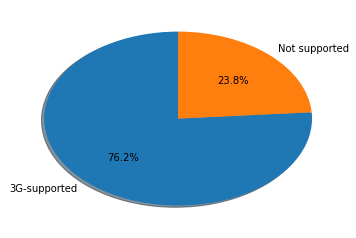

In [10]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


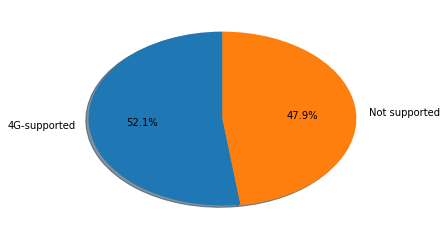

In [11]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

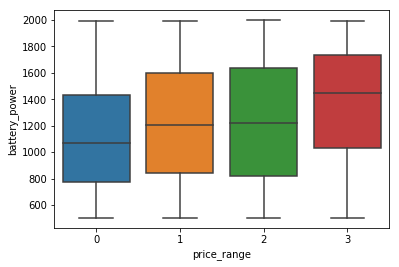

In [12]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5,0,'MegaPixels')

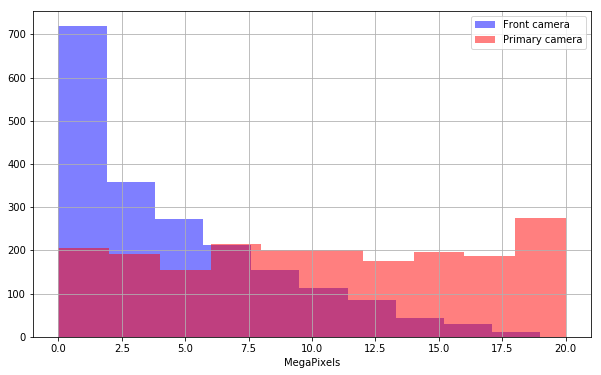

In [13]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

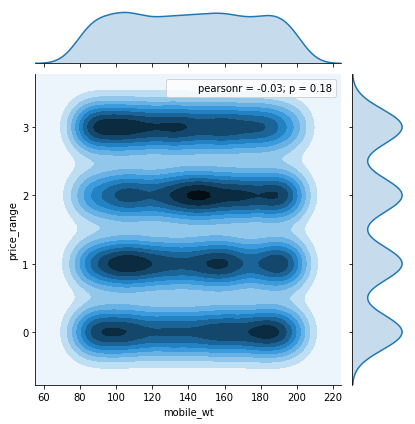

In [14]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

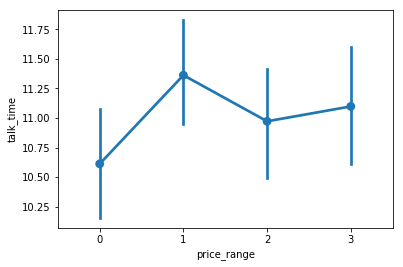

In [15]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## X & Y array

In [16]:
X=dataset.drop('price_range',axis=1)

In [17]:
y=dataset['price_range']

## Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating & Training Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lm.score(X_test,y_test)

0.91328014881852748

## Creating & Training KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
knn.score(X_test,y_test)

0.92121212121212126

### Elbow Method For optimum value of K

In [25]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

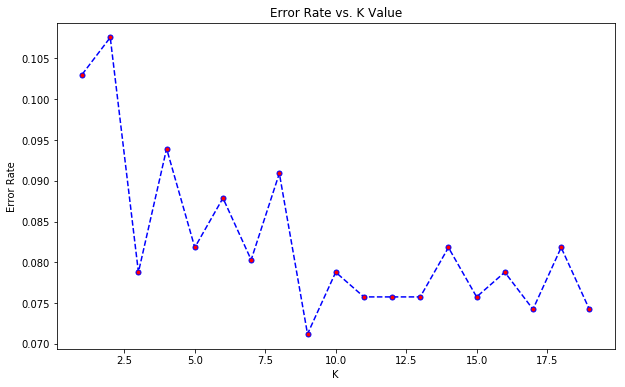

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [28]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
logmodel.score(X_test,y_test)

0.74696969696969695

## Creating & Training Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
dtree.score(X_test,y_test)

0.81818181818181823

## Tree Visualization

In [33]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

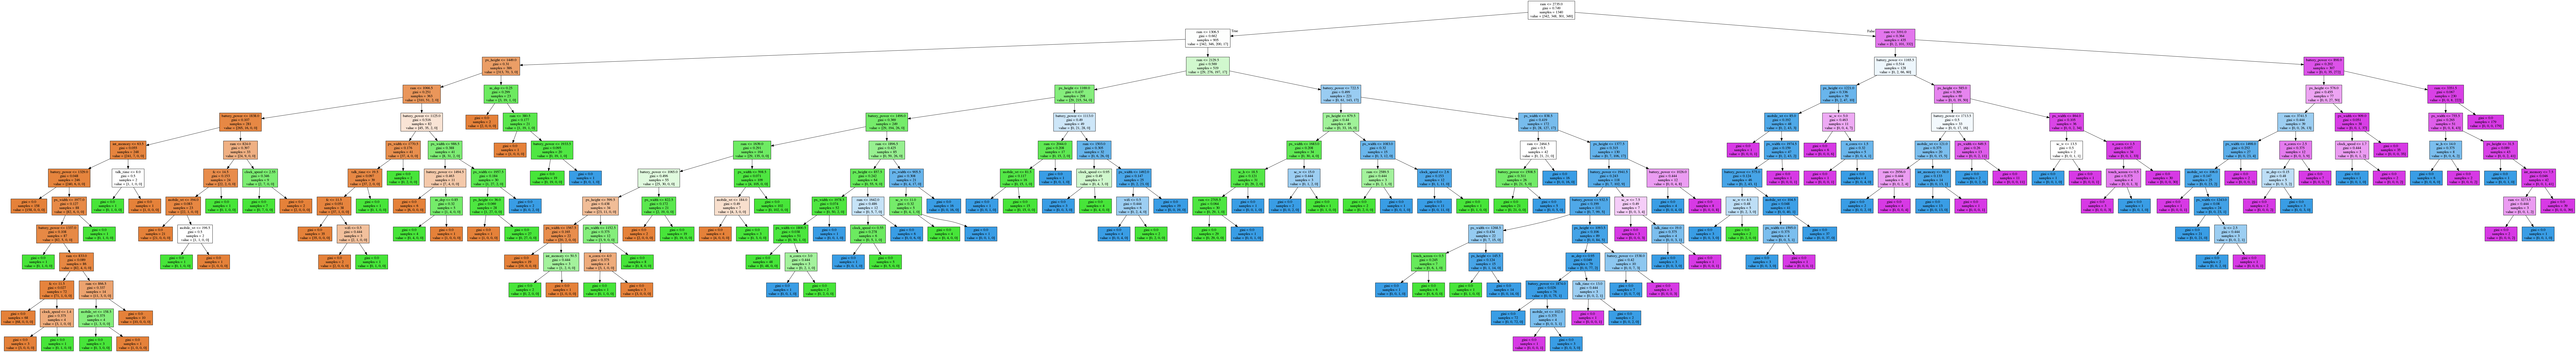

In [55]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Creating & Training Random Tree Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc.score(X_test,y_test)

0.87424242424242427

# Conclusion: KNN & Linear Regression performed the best

## RESULT : Linear Regression

In [38]:
y_pred=lm.predict(X_test)


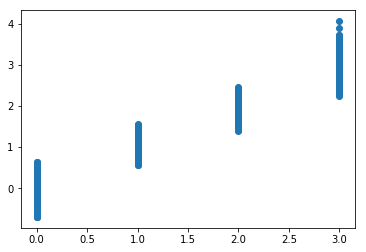

In [39]:
plt.scatter(y_test,y_pred)


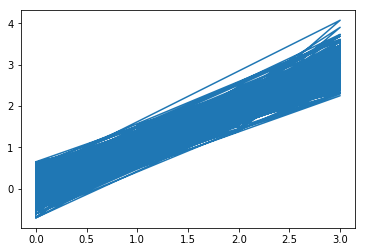

In [40]:
plt.plot(y_test,y_pred)

## RESULT: KNN

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
pred = knn.predict(X_test)

In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       158
          1       0.88      0.95      0.91       152
          2       0.93      0.85      0.89       199
          3       0.92      0.93      0.93       151

avg / total       0.93      0.93      0.93       660



In [44]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


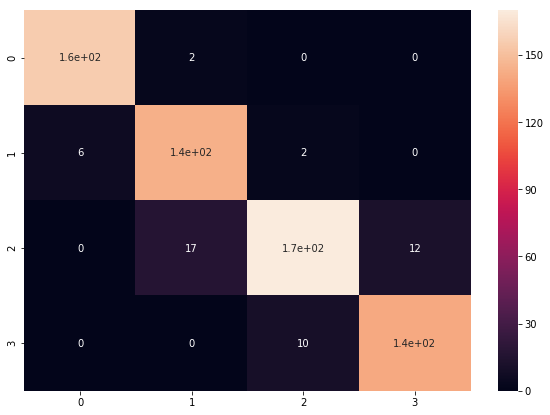

In [45]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)


# Price prediction of Test.csv Using KNN for Prediction

### Import test.csv

In [46]:
data_test=pd.read_csv('../input/test.csv')

In [47]:
data_test.head()

id  battery_power  blue  ...   three_g  touch_screen  wifi
0   1           1043     1  ...         0             1     0
1   2            841     1  ...         1             0     0
2   3           1807     1  ...         0             1     1
3   4           1546     0  ...         1             1     0
4   5           1434     0  ...         1             0     1

[5 rows x 21 columns]

In [48]:
data_test=data_test.drop('id',axis=1)

In [49]:
data_test.head()

battery_power  blue  clock_speed  ...   three_g  touch_screen  wifi
0           1043     1          1.8  ...         0             1     0
1            841     1          0.5  ...         1             0     0
2           1807     1          2.8  ...         0             1     1
3           1546     0          0.5  ...         1             1     0
4           1434     0          1.4  ...         1             0     1

[5 rows x 20 columns]

# Model

In [50]:
predicted_price=knn.predict(data_test)

# Predicted Price Range

In [51]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3, 1,
       1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1, 2, 3, 1,
       2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 0, 1, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 3, 1, 3, 3,
       3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2, 1, 1, 3, 1, 1, 0,
       3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 2,
       1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3, 3, 1, 0, 1, 0, 3, 0, 1,
       0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0,
       2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2,
       0, 3, 0, 0, 2, 0, 0, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2,
       3, 1,

# Adding Predicted price to test.csv

In [52]:
data_test['price_range']=predicted_price

In [53]:
data_test

battery_power  blue     ...       wifi  price_range
0             1043     1     ...          0            3
1              841     1     ...          0            3
2             1807     1     ...          1            2
3             1546     0     ...          0            3
4             1434     0     ...          1            1
5             1464     1     ...          1            3
6             1718     0     ...          0            3
7              833     0     ...          1            1
8             1111     1     ...          0            3
9             1520     0     ...          1            0
10            1500     0     ...          0            3
11            1343     0     ...          1            3
12             900     1     ...          0            0
13            1190     1     ...          0            0
14             630     0     ...          0            2
15            1846     1     ...          1            0
16            1985     0     ...          0            2
17            1042     0     ...          0            1
18            1231     1     ...          1            3
19            1488     0     ...          0            2
20             968     0     ...          0            1
21             529     0     ...          0            3
22            1558     0     ...          1            1
23             533     1     ...          0            1
24            1037     0     ...          0            3
25            1025     0     ...          1            0
26            1858     0     ...          0            2
27             980     0     ...          1            0
28             644     1     ...          1            3
29            1024     1     ...          0            0
..             ...   ...     ...        ...          ...
970           1247     1     ...          0            2
971           1207     0     ...          0            1
972           1198     1     ...          0            2
973           1796     1     ...          1            1
974           1855     0     ...          0            3
975           1557     1     ...          1            0
976            958     0     ...          0            1
977           1882     1     ...          0            3
978           1489     0     ...          1            0
979           1980     0     ...          0            1
980           1235     0     ...          1            0
981            829     0     ...          1            0
982           1998     1     ...          1            3
983           1814     0     ...          0            3
984           1711     1     ...          0            2
985            971     1     ...          0            0
986            991     0     ...          0            0
987            905     0     ...          0            0
988           1653     1     ...          0            0
989            635     1     ...          0            3
990           1807     0     ...          1            2
991           1797     1     ...          1            3
992           1895     0     ...          1            3
993            567     1     ...          1            0
994            936     1     ...          1            0
995           1700     1     ...          0            2
996            609     0     ...          1            1
997           1185     0     ...          0            0
998           1533     1     ...          0            2
999           1270     1     ...          1            2

[1000 rows x 21 columns]